In [1]:
import scanpy as sc
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import os
import math
import seaborn as sns
import anndata as ad
import hdf5plugin
import pandas as pd
import sys
import time

In [2]:
hahn_spatial_assay_anndata = ad.read_h5ad("hahn_spatial_assay_anndata")
hahn_spatial_assay_anndata

AnnData object with n_obs × n_vars = 16277 × 23923
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'nCount_SCT', 'nFeature_SCT', 'sampleID', 'age', 'integrated_snn_res.0.8', 'seurat_clusters', 'clusterLevel', 'regionLevel', 'imagerow', 'imagecol', 'slice', 'imagerow_rotated_v2', 'imagecol_rotated_v2'
    uns: 'regionLevel_colors', 'spatial'
    obsm: 'X_spatial', 'X_spatial_rotated', 'spatial', 'spatial_rotated'

In [3]:
hahn_spatial_assay_anndata.obs['imagerow_int'] = hahn_spatial_assay_anndata.obs['imagerow'] * 100000000
hahn_spatial_assay_anndata.obs['imagecol_int'] = hahn_spatial_assay_anndata.obs['imagecol'] * 100000000

hahn_spatial_assay_anndata.obs['imagerow_int'] = hahn_spatial_assay_anndata.obs['imagerow_int'].astype(int)
hahn_spatial_assay_anndata.obs['imagecol_int'] = hahn_spatial_assay_anndata.obs['imagecol_int'].astype(int)

print(min(hahn_spatial_assay_anndata.obs['imagerow']))
print(max(hahn_spatial_assay_anndata.obs['imagerow']))
print(min(hahn_spatial_assay_anndata.obs['imagecol']))
print(max(hahn_spatial_assay_anndata.obs['imagecol']))
print(min(hahn_spatial_assay_anndata.obs['imagerow_int']))
print(max(hahn_spatial_assay_anndata.obs['imagerow_int']))
print(min(hahn_spatial_assay_anndata.obs['imagecol_int']))
print(max(hahn_spatial_assay_anndata.obs['imagecol_int']))
print()
print(len(hahn_spatial_assay_anndata.obs['imagerow'].value_counts()))
print(len(hahn_spatial_assay_anndata.obs['imagecol'].value_counts()))
print(len(hahn_spatial_assay_anndata.obs['imagerow_int'].value_counts()))
print(len(hahn_spatial_assay_anndata.obs['imagecol_int'].value_counts()))

109.35058967
516.57716607
83.27637003
471.02052389
10935058967
51657716607
8327637003
47102052389

4254
4928
4254
4928


In [4]:
num_x_bins = 65
num_y_bins = 65
num_pixel_row = num_x_bins
num_pixel_height = num_y_bins

original_x_max = 51657716610
original_y_max = 51657716610

x_bin_width = original_x_max / num_x_bins
y_bin_width = original_y_max / num_y_bins

# Assuming your DataFrame is called 'df'
hahn_spatial_assay_anndata.obs['pixelrow'] = pd.cut(hahn_spatial_assay_anndata.obs['imagerow_int'], bins=num_x_bins, labels=False, include_lowest=True)
hahn_spatial_assay_anndata.obs['pixelcol'] = pd.cut(hahn_spatial_assay_anndata.obs['imagecol_int'], bins=num_y_bins, labels=False, include_lowest=True)

print(min(hahn_spatial_assay_anndata.obs['imagerow']))
print(max(hahn_spatial_assay_anndata.obs['imagerow']))
print(min(hahn_spatial_assay_anndata.obs['imagecol']))
print(max(hahn_spatial_assay_anndata.obs['imagecol']))
print(min(hahn_spatial_assay_anndata.obs['pixelrow']))
print(max(hahn_spatial_assay_anndata.obs['pixelrow']))
print(min(hahn_spatial_assay_anndata.obs['pixelcol']))
print(max(hahn_spatial_assay_anndata.obs['pixelcol']))
print()
print(len(hahn_spatial_assay_anndata.obs['imagerow'].value_counts()))
print(len(hahn_spatial_assay_anndata.obs['imagecol'].value_counts()))
print(len(hahn_spatial_assay_anndata.obs['pixelrow'].value_counts()))
print(len(hahn_spatial_assay_anndata.obs['pixelcol'].value_counts()))

display(hahn_spatial_assay_anndata.obs)

109.35058967
516.57716607
83.27637003
471.02052389
0
64
0
64

4254
4928
65
65


,orig.ident,nCount_Spatial,nFeature_Spatial,nCount_SCT,nFeature_SCT,sampleID,age,integrated_snn_res.0.8,seurat_clusters,clusterLevel,regionLevel,imagerow,imagecol,slice,imagerow_rotated_v2,imagecol_rotated_v2,imagerow_int,imagecol_int,pixelrow,pixelcol
Cell,,,,,,,,,,,,,,,,,,,,
AAACAAGTATCTCCCA-1_1_1_1,SeuratProject,55388,8306,24989,6487,Visium_Young_R01_S1,M6,9,9,Layer III,Cortex,359.545911,420.117202,slice1,184.204108,321.752941,35954591071,42011720184,39,56
AAACACCAATAACTGC-1_1_1_1,SeuratProject,28212,6451,25475,6451,Visium_Young_R01_S1,M6,2,2,Hypothalamus,Hypothalamus,413.085952,146.923833,slice1,194.458014,407.666030,41308595160,14692383314,48,10
AAACAGCTTTCAGAAG-1_1_1_1,SeuratProject,49370,8351,25225,6996,Visium_Young_R01_S1,M6,28,28,Amygdala 2,Amygdala,321.533214,113.378910,slice1,233.935555,396.020521,32153321410,11337891012,33,5
AAACAGGGTCTATATT-1_1_1_1,SeuratProject,36521,7391,25328,7135,Visium_Young_R01_S1,M6,28,28,Amygdala 2,Amygdala,344.384777,126.708989,slice1,348.486340,240.747079,34438477738,12670898870,37,7
AAACAGTGTTCCTGGG-1_1_1_1,SeuratProject,28934,6472,25485,6469,Visium_Young_R01_S1,M6,5,5,Thalamus 2,Thalamus,492.773454,226.611336,slice1,104.516605,184.570319,49277345432,22661133586,61,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTCTAGATACGCT-1_2,SeuratProject,17744,5031,23473,5043,Visium_Old_R02_S2,M21,10,10,Cortical subplate,Cortical subplate,184.570319,104.516605,slice1_5_5,226.611336,492.773454,18457031880,10451660513,12,3
TTGTTGTGTGTCAAGA-1_2,SeuratProject,27151,6633,25444,6631,Visium_Old_R02_S2,M21,4,4,Layer V,Cortex,240.747079,348.486340,slice1_5_5,126.708989,344.384777,24074707853,34848634002,20,44
TTGTTTCACATCCAGG-1_2,SeuratProject,8953,3713,22835,4782,Visium_Old_R02_S2,M21,5,5,Thalamus 2,Thalamus,396.020521,233.935555,slice1_5_5,113.378910,321.533214,39602052133,23393555486,45,25


In [5]:
# PRE FILTERING - MUST DO TO ENSURE 3 AGES ALL HAVE THE EXACT SAME GENES

hahn_spatial_assay_anndata = hahn_spatial_assay_anndata[hahn_spatial_assay_anndata.obs['slice'] != 'slice1']
hahn_spatial_assay_anndata = hahn_spatial_assay_anndata[hahn_spatial_assay_anndata.obs['slice'] != 'slice1_1_1']
hahn_spatial_assay_anndata = hahn_spatial_assay_anndata[hahn_spatial_assay_anndata.obs['slice'] != 'slice1_2_2']

# Get the indices of genes with non-zero expression in all cells
genes_to_keep = np.where(hahn_spatial_assay_anndata.X.astype(bool).sum(axis=0))[0]

# Filter the AnnData object to retain only the selected genes
hahn_spatial_assay_anndata = hahn_spatial_assay_anndata[:, genes_to_keep]
hahn_spatial_assay_anndata

View of AnnData object with n_obs × n_vars = 8239 × 22930
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'nCount_SCT', 'nFeature_SCT', 'sampleID', 'age', 'integrated_snn_res.0.8', 'seurat_clusters', 'clusterLevel', 'regionLevel', 'imagerow', 'imagecol', 'slice', 'imagerow_rotated_v2', 'imagecol_rotated_v2', 'imagerow_int', 'imagecol_int', 'pixelrow', 'pixelcol'
    uns: 'regionLevel_colors', 'spatial'
    obsm: 'X_spatial', 'X_spatial_rotated', 'spatial', 'spatial_rotated'

In [6]:
hahn_spatial_assay_anndata.obs

,orig.ident,nCount_Spatial,nFeature_Spatial,nCount_SCT,nFeature_SCT,sampleID,age,integrated_snn_res.0.8,seurat_clusters,clusterLevel,regionLevel,imagerow,imagecol,slice,imagerow_rotated_v2,imagecol_rotated_v2,imagerow_int,imagecol_int,pixelrow,pixelcol
Cell,,,,,,,,,,,,,,,,,,,,
AAACAAGTATCTCCCA-1_2_1,SeuratProject,60077,8570,25034,6630,Visium_Young_R02_S1,M6,7,7,Layer II,Cortex,360.498059,429.638687,slice1_3_3,172.851568,373.754896,36049805918,42963868654,40,58
AAACACCAATAACTGC-1_2_1,SeuratProject,20316,5556,23429,5556,Visium_Young_R02_S1,M6,5,5,Thalamus 2,Thalamus,413.964858,156.665044,slice1_3_3,251.879891,373.168958,41396485788,15666504441,48,12
AAACAGCTTTCAGAAG-1_2_1,SeuratProject,11740,3779,23189,4597,Visium_Young_R02_S1,M6,0,0,White matter,White matter,322.485363,123.120121,slice1_3_3,148.388677,173.364264,32248536257,12312012139,34,6
AAACAGGGTCTATATT-1_2_1,SeuratProject,12775,3995,23573,4387,Visium_Young_R02_S1,M6,6,6,Globus pallidus,Globus pallidus,345.336926,136.450200,slice1_3_3,326.660167,229.394539,34533692585,13645019997,37,8
AAACATGGTGAGAGGA-1_2_1,SeuratProject,23045,6225,23741,6225,Visium_Young_R02_S1,M6,2,2,Hypothalamus,Hypothalamus,431.616226,94.189456,slice1_3_3,326.806652,252.319345,43161622567,9418945634,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTCTAGATACGCT-1_2,SeuratProject,17744,5031,23473,5043,Visium_Old_R02_S2,M21,10,10,Cortical subplate,Cortical subplate,184.570319,104.516605,slice1_5_5,226.611336,492.773454,18457031880,10451660513,12,3
TTGTTGTGTGTCAAGA-1_2,SeuratProject,27151,6633,25444,6631,Visium_Old_R02_S2,M21,4,4,Layer V,Cortex,240.747079,348.486340,slice1_5_5,126.708989,344.384777,24074707853,34848634002,20,44
TTGTTTCACATCCAGG-1_2,SeuratProject,8953,3713,22835,4782,Visium_Old_R02_S2,M21,5,5,Thalamus 2,Thalamus,396.020521,233.935555,slice1_5_5,113.378910,321.533214,39602052133,23393555486,45,25


In [7]:
# Filter for specific Age and Slice

specific_age = 'M6'            # (M6, M18, M21)
specific_slice = 'slice1_3_3'  # 'slice1', 'slice1_1_1', 'slice1_2_2', 'slice1_3_3', 'slice1_4_4', 'slice1_5_5'

age_specific_anndata = hahn_spatial_assay_anndata[hahn_spatial_assay_anndata.obs['age'] == specific_age]
specific_age_slice_mouse_anndata = age_specific_anndata[age_specific_anndata.obs['slice'] == specific_slice]

unique_row_pixel_vals = specific_age_slice_mouse_anndata.obs['pixelrow'].unique()
unique_row_pixel_vals.sort()
unique_num_pixel_row = len(unique_row_pixel_vals)

unique_col_pixel_vals = specific_age_slice_mouse_anndata.obs['pixelcol'].unique()
unique_col_pixel_vals.sort()
unique_num_pixel_height = len(unique_col_pixel_vals)

print("Number of Cells: ", specific_age_slice_mouse_anndata.X.shape[0])
print("Number of Genes: ", specific_age_slice_mouse_anndata.X.shape[1])
print("# Pixel for Rows:", num_pixel_row)
print("# Pixel for Heights:", num_pixel_height)
print("# Pixels in total:", num_pixel_row*num_pixel_height)

Number of Cells:  2743
Number of Genes:  22930
# Pixel for Rows: 65
# Pixel for Heights: 65
# Pixels in total: 4225


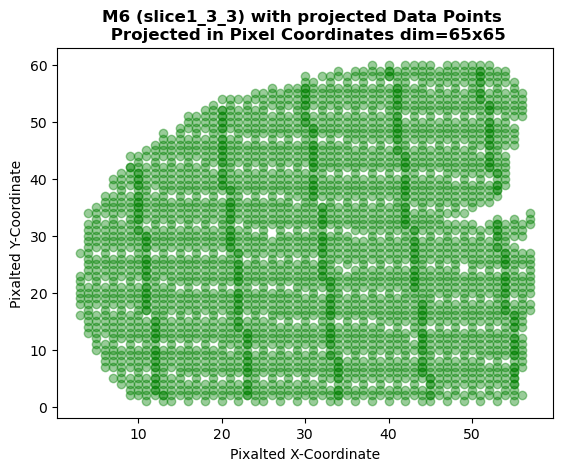

In [8]:
plt.scatter(specific_age_slice_mouse_anndata.obs['pixelrow'], specific_age_slice_mouse_anndata.obs['pixelcol'], color='green', alpha=0.4)
plt.xlabel('Pixalted X-Coordinate')
plt.ylabel('Pixalted Y-Coordinate')
plt.title(specific_age + " (" + specific_slice + ") with projected Data Points \n Projected in Pixel Coordinates" + " dim=" + str(num_x_bins) + "x" + str(num_y_bins), fontweight="bold")
plt.show()

In [9]:
"""
code should create a pandas DataFrame df with three-level row indices (corresponding to the gene name, col1, and col2) and 
columns corresponding to the gene names. The values in the DataFrame are the corresponding X values for each gene and each 
combination of col1 and col2.
"""

gene_col_index_lst = list(specific_age_slice_mouse_anndata.var.index)
gene_col_index_lst.sort()

"""

# OLD VERSION
# assume that your AnnData object is called `adata`
# first, extract the gene names and observation column values you're interested in
gene_col_index_lst = np.where(specific_age_slice_mouse_anndata.X.any(axis=0))[0]
gene_col_index_lst.sort()

QUICK TUTORIAL for why we use np.where(specific_age_slice_mouse_anndata.X.any(axis=0))[0]

print('', [True, False, False], '\n', [False, False, True], '\n', [True, False, True])
print()
print(np.any([[True, False, False], [False, False, True], [True, False, True]], axis=0))
print()
print(np.any([[True, False, False], [False, False, True], [True, False, True]], axis=1))
print()
print(np.where(np.any([[True, False, False], [False, False, True], [True, False, True]], axis=0)))
print()
print(np.where(np.any([[True, False, False], [False, False, True], [True, False, True]], axis=1)))
"""

# create an empty 3D numpy array to store the data
gene_expression_2D_array = np.empty((len(gene_col_index_lst), num_pixel_row, num_pixel_height))
print(gene_expression_2D_array.shape)

(22930, 65, 65)


In [10]:
start_time = time.time()

# define the range of values for each column
col1_range = range(0, num_pixel_row)
col2_range = range(0, num_pixel_height)

# create a new dataframe with all possible combinations of values for the two columns
all_combin_row_and_col_coord_df = pd.DataFrame([(i, j) for i in col1_range for j in col2_range], columns=['pixelrow', 'pixelcol'])

index_to_gene_index_dict = {}

# loop over the genes and fill in the corresponding X values
count = 0
for gene_index in gene_col_index_lst:
    index_to_gene_index_dict[count] = gene_index
    gene_pixel_coords_df = specific_age_slice_mouse_anndata[:, gene_index].obs[["pixelrow", "pixelcol"]].copy()
    gene_pixel_coords_df["X_val"] = specific_age_slice_mouse_anndata[gene_pixel_coords_df.index, gene_index].X.flatten().tolist().copy()
    gene_pixel_coords_mean_df = gene_pixel_coords_df.groupby(["pixelrow", "pixelcol"]).mean().reset_index()
    
    # merge the all_combin_row_and_col_coord_df with the original dataframe and fill missing values with 0 in X_val
    gene_expression_2D_array[count,:,:] = pd.merge(gene_pixel_coords_mean_df, all_combin_row_and_col_coord_df, 
                         on=['pixelrow', 'pixelcol'], how='right').fillna({'X_val': 0}).pivot(index='pixelrow', 
                                                                                              columns='pixelcol', 
                                                                                              values='X_val').copy().to_numpy()
    
    
    if count % 1000 == 0:
        print("Finished processing this many genes: ", count)
    count = count + 1
    
print()
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))
print("Elapsed time: {:.2f} minutes".format(elapsed_time/60))
print("Elapsed time: {:.2f} hours".format(elapsed_time/360))

Finished processing this many genes:  0
Finished processing this many genes:  1000
Finished processing this many genes:  2000
Finished processing this many genes:  3000
Finished processing this many genes:  4000
Finished processing this many genes:  5000
Finished processing this many genes:  6000
Finished processing this many genes:  7000
Finished processing this many genes:  8000
Finished processing this many genes:  9000
Finished processing this many genes:  10000
Finished processing this many genes:  11000
Finished processing this many genes:  12000
Finished processing this many genes:  13000
Finished processing this many genes:  14000
Finished processing this many genes:  15000
Finished processing this many genes:  16000
Finished processing this many genes:  17000
Finished processing this many genes:  18000
Finished processing this many genes:  19000
Finished processing this many genes:  20000
Finished processing this many genes:  21000
Finished processing this many genes:  22000



In [11]:
# Create the directory if it doesn't already exist
parent_dirname = "pixelated_spatial_gene_expression"
if not os.path.exists(parent_dirname):
    os.makedirs(parent_dirname)

child_dirname = parent_dirname + '/' + specific_age + "_" + specific_slice + "_dim=" + str(num_x_bins) + "_by_" + str(num_y_bins)
if not os.path.exists(child_dirname):
    os.makedirs(child_dirname)

# save the 4-dimensional NumPy array to a NPY file
np.save(child_dirname + '/' + specific_age + "_" + specific_slice + "_dim=" + str(num_x_bins) + "_by_" + str(num_y_bins) + '_gene_expression_2D_array.npy', gene_expression_2D_array)

In [ ]:
M6_slice1_3_3_55_by_55_gene_expression_2D_array = np.load('pixelated_spatial_gene_expression/M6_slice1_3_3_dim=55_by_55/M6_slice1_3_3_dim=55_by_55_gene_expression_2D_array.npy')
M18_slice1_4_4_55_by_55_gene_expression_2D_array = np.load('pixelated_spatial_gene_expression/M18_slice1_4_4_dim=55_by_55/M18_slice1_4_4_dim=55_by_55_gene_expression_2D_array.npy')
M21_slice1_5_5_55_by_55_gene_expression_2D_array = np.load('pixelated_spatial_gene_expression/M21_slice1_5_5_dim=55_by_55/M21_slice1_5_5_dim=55_by_55_gene_expression_2D_array.npy')

print("M6_slice1_3_3_55_by_55_gene_expression_2D_array shape:", M6_slice1_3_3_55_by_55_gene_expression_2D_array.shape)
print("M18_slice1_4_4_55_by_55_gene_expression_2D_array shape:", M18_slice1_4_4_55_by_55_gene_expression_2D_array.shape)
print("M21_slice1_5_5_55_by_55_gene_expression_2D_array shape:", M21_slice1_5_5_55_by_55_gene_expression_2D_array.shape)
print()

M6_slice1_3_3_55_by_55_gene_expression_2D_cutdown_array = M6_slice1_3_3_55_by_55_gene_expression_2D_array[:22930, :, :]
M18_slice1_4_4_55_by_55_gene_expression_2D_cutdown_array = M18_slice1_4_4_55_by_55_gene_expression_2D_array[:22930, :, :]
M21_slice1_5_5_55_by_55_gene_expression_2D_cutdown_array = M21_slice1_5_5_55_by_55_gene_expression_2D_array[:22930, :, :]

# Combine the arrays along the first dimension
combined_mouse_ages_55_by_55_gene_expression = np.concatenate(
    (M6_slice1_3_3_55_by_55_gene_expression_2D_cutdown_array,
     M18_slice1_4_4_55_by_55_gene_expression_2D_cutdown_array,
     M21_slice1_5_5_55_by_55_gene_expression_2D_cutdown_array),
    axis=1
)

# Verify the shape of the combined array
print('combined_mouse_ages_55_by_55_gene_expression shape:', combined_mouse_ages_55_by_55_gene_expression.shape)

# Create the directory if it doesn't already exist
parent_dirname = "pixelated_spatial_gene_expression"
if not os.path.exists(parent_dirname):
    os.makedirs(parent_dirname)

# save the 4-dimensional NumPy array to a NPY file
np.save(parent_dirname + '/' + 'combined_mouse_ages_55_by_55_gene_expression.npy', combined_mouse_ages_55_by_55_gene_expression)

In [ ]:
M6_slice1_3_3_100_by_100_gene_expression_2D_array = np.load('pixelated_spatial_gene_expression/M6_slice1_3_3_dim=100_by_100/M6_slice1_3_3_dim=100_by_100_gene_expression_2D_array.npy')
M18_slice1_4_4_100_by_100_gene_expression_2D_array = np.load('pixelated_spatial_gene_expression/M18_slice1_4_4_dim=100_by_100/M18_slice1_4_4_dim=100_by_100_gene_expression_2D_array.npy')
M21_slice1_5_5_100_by_100_gene_expression_2D_array = np.load('pixelated_spatial_gene_expression/M21_slice1_5_5_dim=100_by_100/M21_slice1_5_5_dim=100_by_100_gene_expression_2D_array.npy')

print("M6_slice1_3_3_100_by_100_gene_expression_2D_array shape:", M6_slice1_3_3_100_by_100_gene_expression_2D_array.shape)
print("M18_slice1_4_4_100_by_100_gene_expression_2D_array shape:", M18_slice1_4_4_100_by_100_gene_expression_2D_array.shape)
print("M21_slice1_5_5_100_by_100_gene_expression_2D_array shape:", M21_slice1_5_5_100_by_100_gene_expression_2D_array.shape)
print()

M6_slice1_3_3_100_by_100_gene_expression_2D_cutdown_array = M6_slice1_3_3_100_by_100_gene_expression_2D_array[:22930, :, :]
M18_slice1_4_4_100_by_100_gene_expression_2D_cutdown_array = M18_slice1_4_4_100_by_100_gene_expression_2D_array[:22930, :, :]
M21_slice1_5_5_100_by_100_gene_expression_2D_cutdown_array = M21_slice1_5_5_100_by_100_gene_expression_2D_array[:22930, :, :]

# Combine the arrays along the first dimension
combined_mouse_ages_100_by_100_gene_expression = np.concatenate(
    (M6_slice1_3_3_100_by_100_gene_expression_2D_cutdown_array,
     M18_slice1_4_4_100_by_100_gene_expression_2D_cutdown_array,
     M21_slice1_5_5_100_by_100_gene_expression_2D_cutdown_array),
    axis=1
)

# Verify the shape of the combined array
print('combined_mouse_ages_100_by_100_gene_expression shape:', combined_mouse_ages_100_by_100_gene_expression.shape)

# Create the directory if it doesn't already exist
parent_dirname = "pixelated_spatial_gene_expression"
if not os.path.exists(parent_dirname):
    os.makedirs(parent_dirname)

# save the 4-dimensional NumPy array to a NPY file
np.save(parent_dirname + '/' + 'combined_mouse_ages_100_by_100_gene_expression.npy', combined_mouse_ages_100_by_100_gene_expression)

In [ ]:
M6_slice1_3_3_150_by_150_gene_expression_2D_array = np.load('pixelated_spatial_gene_expression/M6_slice1_3_3_dim=150_by_150/M6_slice1_3_3_dim=150_by_150_gene_expression_2D_array.npy')
M18_slice1_4_4_150_by_150_gene_expression_2D_array = np.load('pixelated_spatial_gene_expression/M18_slice1_4_4_dim=150_by_150/M18_slice1_4_4_dim=150_by_150_gene_expression_2D_array.npy')
M21_slice1_5_5_150_by_150_gene_expression_2D_array = np.load('pixelated_spatial_gene_expression/M21_slice1_5_5_dim=150_by_150/M21_slice1_5_5_dim=150_by_150_gene_expression_2D_array.npy')

print("M6_slice1_3_3_150_by_150_gene_expression_2D_array shape:", M6_slice1_3_3_150_by_150_gene_expression_2D_array.shape)
print("M18_slice1_4_4_150_by_150_gene_expression_2D_array shape:", M18_slice1_4_4_150_by_150_gene_expression_2D_array.shape)
print("M21_slice1_5_5_150_by_150_gene_expression_2D_array shape:", M21_slice1_5_5_150_by_150_gene_expression_2D_array.shape)
print()

M6_slice1_3_3_150_by_150_gene_expression_2D_cutdown_array = M6_slice1_3_3_150_by_150_gene_expression_2D_array[:22930, :, :]
M18_slice1_4_4_150_by_150_gene_expression_2D_cutdown_array = M18_slice1_4_4_150_by_150_gene_expression_2D_array[:22930, :, :]
M21_slice1_5_5_150_by_150_gene_expression_2D_cutdown_array = M21_slice1_5_5_150_by_150_gene_expression_2D_array[:22930, :, :]

# Combine the arrays along the first dimension
combined_mouse_ages_150_by_150_gene_expression = np.concatenate(
    (M6_slice1_3_3_150_by_150_gene_expression_2D_cutdown_array,
     M18_slice1_4_4_150_by_150_gene_expression_2D_cutdown_array,
     M21_slice1_5_5_150_by_150_gene_expression_2D_cutdown_array),
    axis=1
)

# Verify the shape of the combined array
print('combined_mouse_ages_150_by_150_gene_expression shape:', combined_mouse_ages_150_by_150_gene_expression.shape)

# Create the directory if it doesn't already exist
parent_dirname = "pixelated_spatial_gene_expression"
if not os.path.exists(parent_dirname):
    os.makedirs(parent_dirname)

# save the 4-dimensional NumPy array to a NPY file
np.save(parent_dirname + '/' + 'combined_mouse_ages_150_by_150_gene_expression.npy', combined_mouse_ages_150_by_150_gene_expression)

## Extra analysis 

In [ ]:
start_time = time.time()

# Get the shape of the array
shape = gene_expression_2D_array.shape

# Get the indices for each dimension of the array
idx0, idx1, idx2 = np.indices(shape)

# Reshape the arrays to 1D arrays
idx0 = idx0.ravel()
idx1 = idx1.ravel()
idx2 = idx2.ravel()
val = gene_expression_2D_array.ravel()

# Create a dataframe using the index arrays and values
gene_loc_val_df = pd.DataFrame({'2D Array Index': idx0, 'pixelrow': idx1, 'pixelcol': idx2, 'value': val})
gene_loc_val_df["AnnData Gene Index"] = gene_loc_val_df["2D Array Index"].map(index_to_gene_index_dict)
gene_loc_val_df["Gene"] = gene_loc_val_df["AnnData Gene Index"].map(dict(enumerate(specific_age_slice_mouse_anndata.var.index)))


end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))
print("Elapsed time: {:.2f} minutes".format(elapsed_time/60))
print("Elapsed time: {:.2f} hours".format(elapsed_time/360))
display(gene_loc_val_df)

In [ ]:
start_time = time.time()

# save the Pandas DataFrame to a CSV file
# gene_loc_val_df.to_csv(child_dirname + '/' + 'gene_loc_val.csv', index=False)

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))
print("Elapsed time: {:.2f} minutes".format(elapsed_time/60))
print("Elapsed time: {:.2f} hours".format(elapsed_time/360))

In [ ]:
gene_of_interest = "C4b"
specific_gene_df = gene_loc_val_df[gene_loc_val_df["Gene"]=="C4b"]

In [ ]:
specific_gene_coord_val_df = specific_gene_df.groupby(["pixelrow", "pixelcol"]).mean()
specific_gene_coord_val_df.reset_index(inplace=True)
specific_gene_coord_val_df = specific_gene_coord_val_df[["pixelrow", "pixelcol", "value"]]
specific_gene_coord_val_df

In [ ]:
# Reshape the dataframe using pivot
matrix = specific_gene_coord_val_df.pivot(index='pixelcol', columns='pixelrow', values='value')

# Create the plot
fig, ax = plt.subplots()
im = ax.imshow(matrix, cmap='viridis', label='Gene Expression', origin='lower')

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

graph_title = gene_of_interest + ' Gene Expression Level for 6-Month, Slice 1_3_3 \n in Pixel Coordinates ' + "dim=" + str(num_x_bins) + "_by_" + str(num_y_bins)

plt.xlabel('Pixel Horizontal Coordinate')
plt.ylabel('Pixel Vertical Coordinate')
plt.title(graph_title)

plt.savefig(child_dirname + "/" + gene_of_interest + ' Gene Expression Level for 6-Month, Slice 1_3_3 in Pixel Coordinates ' + "dim=" + str(num_x_bins) + "_by_" + str(num_y_bins) + '.png', dpi=300, bbox_inches='tight', pad_inches=0, transparent=False)
plt.show()
